In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)

In [2]:
def draw_heatmap(dataframe: pd.DataFrame) -> None:
    plt.figure(figsize=(10, 10))
    sns.heatmap(
        dataframe.corr(),
        xticklabels=dataframe.corr().columns,
        yticklabels=dataframe.corr().columns,
        annot=True,
    )

In [3]:
df = pd.read_csv("spaceship_titanic.csv")
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [5]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [6]:
cat_columns = ["HomePlanet", "Cabin", "Destination"]

In [7]:
for column_name in cat_columns:
    frequent_pl = df[column_name].value_counts().head(1).index[0]
    df[column_name].fillna(frequent_pl, inplace=True)

In [8]:
for name in [
    "Age",
    "CryoSleep",
    "VIP",
    "RoomService",
    "FoodCourt",
    "ShoppingMall",
    "Spa",
    "VRDeck",
]:
    df[name].fillna(df[name].median(), inplace=True)

In [9]:
df.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [10]:
hashmap_cat = {}
for col in cat_columns:
    for i, val in enumerate(pd.unique(df[col])):
        hashmap_cat[val] = i

# print(hashmap_cat)

for col in cat_columns:
    for val in pd.unique(df[col]):
        df[col].replace(val, hashmap_cat[val], inplace=True)

## Нахождение родственников

In [11]:
id_name_df = df[["Cabin", "Name"]]
id_name_df

,Cabin,Name
0,0,Maham Ofracculy
1,1,Juanna Vines
2,2,Altark Susent
3,2,Solam Susent
4,3,Willy Santantines
...,...,...
8688,6556,Gravior Noxnuther
8689,6557,Kurta Mondalley
8690,6558,Fayey Connon
8691,6559,Celeon Hontichre


In [12]:
id_name_df["Name"].fillna(
    "404 404", inplace=True
)  # Да, костыль. Да, нужно было бы проходиться по каждой строке. Но оно работает в рамках поставленной задачи!
id_name_df["Name"] = id_name_df["Name"].astype(str)
id_name_df

C:\Users\artem\AppData\Local\Temp\ipykernel_20908\3439981522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  id_name_df["Name"].fillna(
C:\Users\artem\AppData\Local\Temp\ipykernel_20908\3439981522.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  id_name_df["Name"] = id_name_df["Name"].astype(str)


,Cabin,Name
0,0,Maham Ofracculy
1,1,Juanna Vines
2,2,Altark Susent
3,2,Solam Susent
4,3,Willy Santantines
...,...,...
8688,6556,Gravior Noxnuther
8689,6557,Kurta Mondalley
8690,6558,Fayey Connon
8691,6559,Celeon Hontichre


In [13]:
from numpy import nan

In [14]:
# id_name_df['PassengerId'] = id_name_df['PassengerId'].map(lambda x: x.split("_")[0])
id_name_df["Name"] = id_name_df["Name"].map(lambda x: x.split(" ")[1])
id_name_df["Name"].replace("404", nan, inplace=True)
id_name_df

C:\Users\artem\AppData\Local\Temp\ipykernel_20908\3735452480.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  id_name_df["Name"] = id_name_df["Name"].map(lambda x: x.split(" ")[1])
C:\Users\artem\AppData\Local\Temp\ipykernel_20908\3735452480.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  id_name_df["Name"].replace("404", nan, inplace=True)


,Cabin,Name
0,0,Ofracculy
1,1,Vines
2,2,Susent
3,2,Susent
4,3,Santantines
...,...,...
8688,6556,Noxnuther
8689,6557,Mondalley
8690,6558,Connon
8691,6559,Hontichre


In [15]:
ppd = id_name_df.groupby(by=["Cabin", "Name"], dropna=False)["Name"].transform("count")
# ppd = ppd.replace(id_name_df.iloc[nan], 0, inplace=True)

# ['Name'].transform('size')
# ppd.replace(id_name_df.iloc[nan], 0, inplace=True)
not_family = False
if not_family:
    """
    Является ли человек частью своей семьи?
    """
    ppd = ppd.map(lambda x: max(0, x - 1))

# ppd.replace(1, 0, inplace=True)
ppd
ppd.sort_values(ascending=False)

685     7
684     7
689     7
687     7
686     7
       ..
77      0
58      0
65      0
27      0
8664    0
Name: Name, Length: 8693, dtype: int64

In [16]:
df["Count_family"] = ppd
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Count_family
0,0001_01,0,False,0,0,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1
1,0002_01,1,False,1,0,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1
2,0003_01,0,False,2,0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,2
3,0003_02,0,False,2,0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,2
4,0004_01,1,False,3,0,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,False,6556,2,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,1
8689,9278_01,1,True,6557,1,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,1
8690,9279_01,1,False,6558,0,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,1
8691,9280_01,0,False,6559,2,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,2


## Отсекание лишнего

<Axes: >

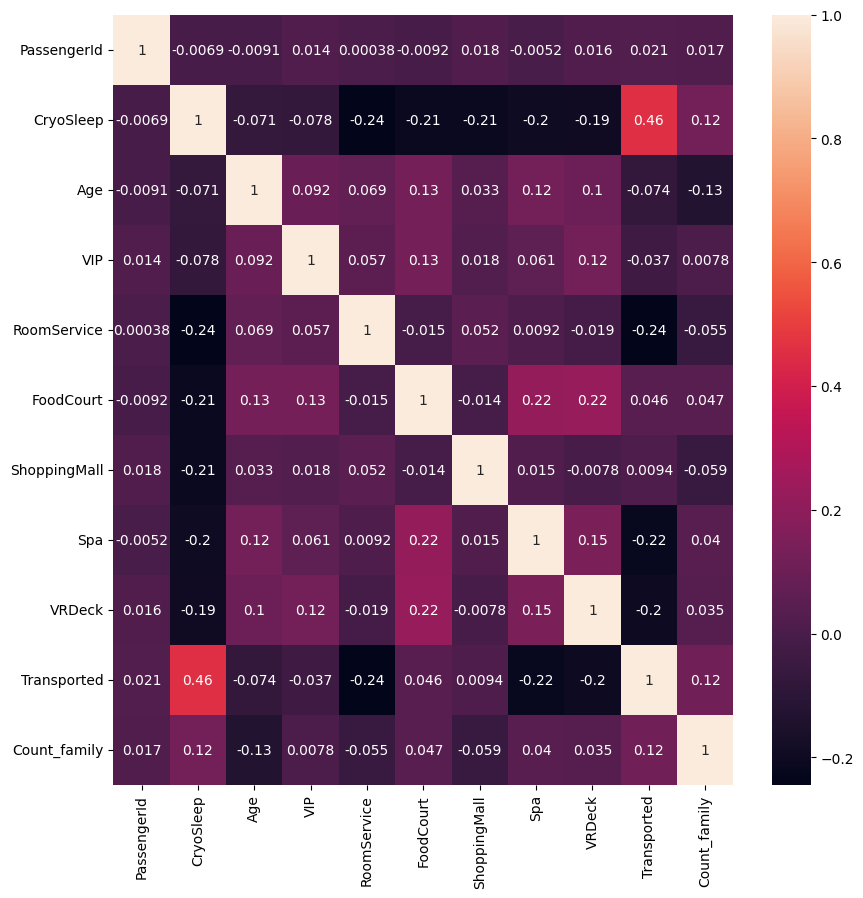

In [17]:
sdf = df.drop(columns=["Name"] + cat_columns, axis=1)
plt.figure(figsize=(10, 10))
sns.heatmap(
    sdf.corr(),
    xticklabels=sdf.corr().columns,
    yticklabels=sdf.corr().columns,
    annot=True,
)

## Дальнейшая обработка

In [18]:
sdf.drop(
    columns=["PassengerId", "ShoppingMall", "FoodCourt", "Age", "VIP"], inplace=True
)
sdf

,CryoSleep,RoomService,Spa,VRDeck,Transported,Count_family
0,False,0.0,0.0,0.0,False,1
1,False,109.0,549.0,44.0,True,1
2,False,43.0,6715.0,49.0,False,2
3,False,0.0,3329.0,193.0,False,2
4,False,303.0,565.0,2.0,True,1
...,...,...,...,...,...,...
8688,False,0.0,1643.0,74.0,False,1
8689,True,0.0,0.0,0.0,False,1
8690,False,0.0,1.0,0.0,True,1
8691,False,0.0,353.0,3235.0,False,2


<Axes: >

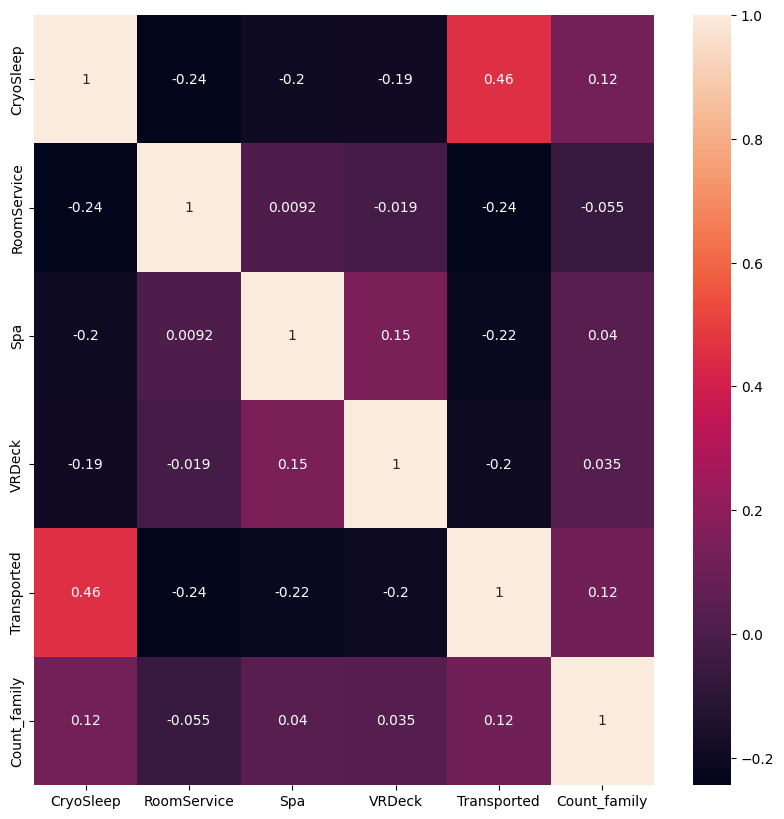

In [19]:
plt.figure(figsize=(10, 10))
sns.heatmap(
    sdf.corr(),
    xticklabels=sdf.corr().columns,
    yticklabels=sdf.corr().columns,
    annot=True,
)

## Отделение целевой функции

In [20]:
split_sdf = sdf.drop(columns=["Transported"])
split_sdf

,CryoSleep,RoomService,Spa,VRDeck,Count_family
0,False,0.0,0.0,0.0,1
1,False,109.0,549.0,44.0,1
2,False,43.0,6715.0,49.0,2
3,False,0.0,3329.0,193.0,2
4,False,303.0,565.0,2.0,1
...,...,...,...,...,...
8688,False,0.0,1643.0,74.0,1
8689,True,0.0,0.0,0.0,1
8690,False,0.0,1.0,0.0,1
8691,False,0.0,353.0,3235.0,2


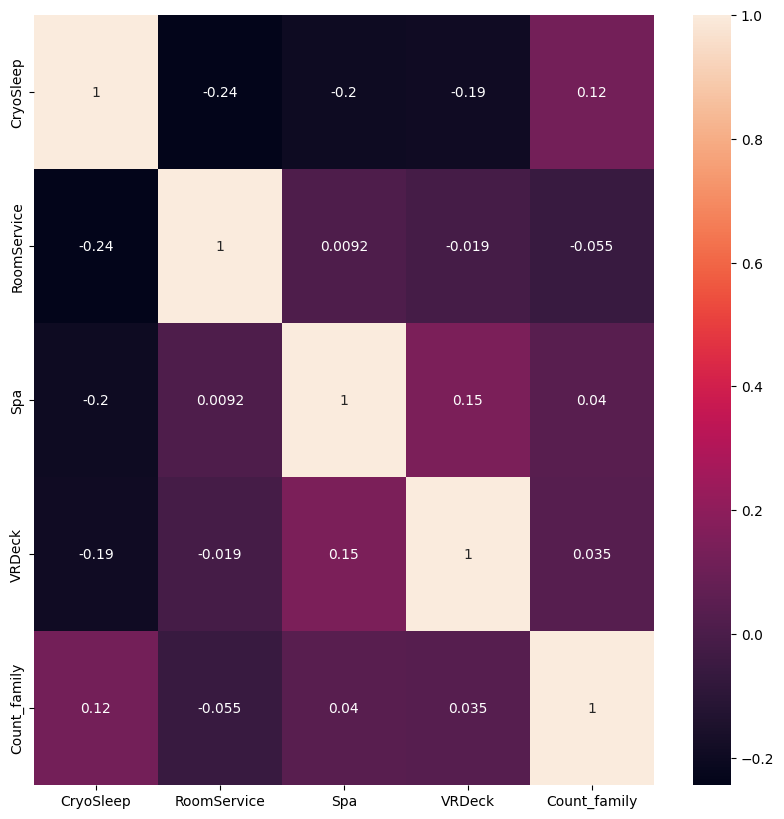

In [21]:
draw_heatmap(split_sdf)

## Убирание выбросов

Забавно, но от этого прога работает хуже)

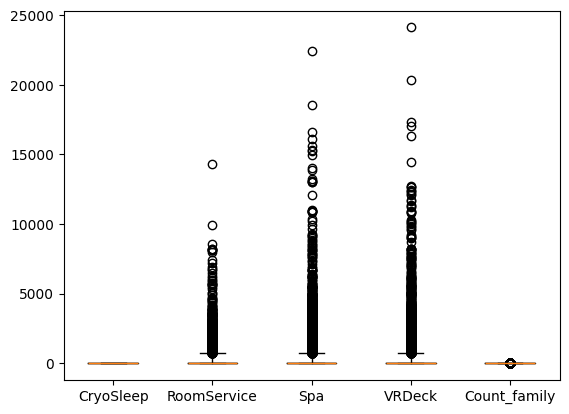

In [22]:
from numpy import median, where

# plt.boxplot(df[features].values, whis=(0, 100))

features = sdf.drop(columns=["Transported"]).columns
plt.boxplot(sdf[features].values, whis=(10, 90))

# Добавление меток осей x
plt.xticks(range(1, len(features) + 1), features)

plt.show()

In [23]:
def get_whiskers(dataframe: pd.DataFrame, feature: str):
    # Визуализация данных выбросами
    _x = dataframe.boxplot(column=feature, whis=(10, 90))
    plt.close("all")
    # Получение границ усов
    whiskers = []
    for line in _x.lines:
        if line.get_linestyle() == "-":
            whiskers.append(line.get_ydata())

    whiskers = whiskers[1:3]
    lower_whisker = whiskers[0][1]
    upper_whisker = whiskers[1][1]

    return lower_whisker, upper_whisker

In [24]:
def delete_outlines(dataframe: pd.DataFrame, feature):
    lw, uw = get_whiskers(dataframe, feature)

    cur_median = median(
        dataframe[feature]
    )  # По-стандарту, выбросы заменяются на медианные значения (если, конечно, выбросов не слишком много.
    # Тогда уже всё плохо и нужно брать другую выборку)
    return where(
        (dataframe[feature] > uw) | (dataframe[feature] < lw),
        cur_median,
        dataframe[feature],
    )  # Условие, при истине, при лжи

In [25]:
sdf[features[0]] = sdf[features[0]].astype(float)
sdf

,CryoSleep,RoomService,Spa,VRDeck,Transported,Count_family
0,0.0,0.0,0.0,0.0,False,1
1,0.0,109.0,549.0,44.0,True,1
2,0.0,43.0,6715.0,49.0,False,2
3,0.0,0.0,3329.0,193.0,False,2
4,0.0,303.0,565.0,2.0,True,1
...,...,...,...,...,...,...
8688,0.0,0.0,1643.0,74.0,False,1
8689,1.0,0.0,0.0,0.0,False,1
8690,0.0,0.0,1.0,0.0,True,1
8691,0.0,0.0,353.0,3235.0,False,2


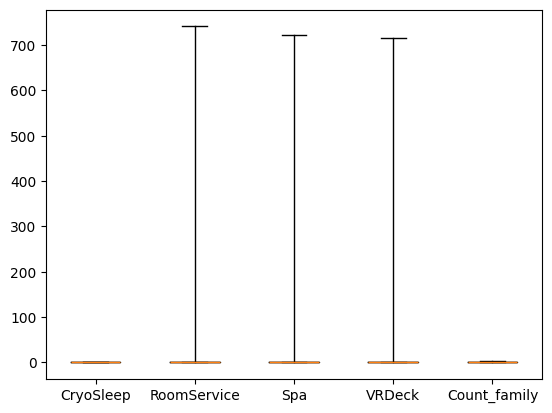

In [26]:
for f in features:
    sdf[f] = delete_outlines(sdf, f)
# Вывод boxplot для выбранных столбцов
plt.boxplot(sdf[features].values, whis=(0, 100))
# plt.boxplot(df[features].values)

# Добавление меток осей x
plt.xticks(range(1, len(features) + 1), features)

# Отображение графика
plt.show()

## Нормализация

In [27]:
for f in sdf.columns:
    misdf = min(sdf[f])
    masdf = max(sdf[f])
    sdf[f] = sdf[f].map(lambda x: (x - misdf) / (masdf - misdf))

sdf

,CryoSleep,RoomService,Spa,VRDeck,Transported,Count_family
0,0.0,0.000000,0.000000,0.000000,0.0,0.0
1,0.0,0.147099,0.760388,0.061453,1.0,0.0
2,0.0,0.058030,0.000000,0.068436,0.0,0.5
3,0.0,0.000000,0.000000,0.269553,0.0,0.5
4,0.0,0.408907,0.782548,0.002793,1.0,0.0
...,...,...,...,...,...,...
8688,0.0,0.000000,0.000000,0.103352,0.0,0.0
8689,1.0,0.000000,0.000000,0.000000,0.0,0.0
8690,0.0,0.000000,0.001385,0.000000,1.0,0.0
8691,0.0,0.000000,0.488920,0.000000,0.0,0.5


# Обучение моделей

In [28]:
from sklearn.model_selection import train_test_split as tts

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
)
import xgboost as xgb

1. **accuracy_score** - это метрика, которая показывает долю правильно классифицированных образцов в обучающем наборе данных. Она вычисляется как отношение количества правильно классифицированных образцов к общему количеству образцов.

2. **precision_score** - это метрика, которая показывает, насколько точны положительные прогнозы модели. Она вычисляется как отношение истинно положительных прогнозов к сумме истинно положительных и ложно положительных прогнозов.

3. **recall_score** - это метрика, которая показывает, насколько хорошо модель обнаруживает положительные образцы. Она вычисляется как отношение истинно положительных прогнозов к сумме истинно положительных и ложно отрицательных прогнозов.

4. **f1_score** - это метрика, которая является гармоническим средним между точностью и полнотой. Она используется, когда важно учесть обе метрики одновременно.

5. **confusion_matrix** - это матрица, которая показывает количество истинно положительных, ложно положительных, истинно отрицательных и ложно отрицательных прогнозов модели. Она используется для более детального анализа ошибок модели.

In [30]:
def get_score(y_true, y_pred):
    return (
        accuracy_score(y_true, y_pred),
        precision_score(y_true, y_pred),
        recall_score(y_true, y_pred),
        f1_score(y_true, y_pred),
        confusion_matrix(y_true, y_pred),
    )

In [31]:
df_train, df_test = tts(sdf, train_size=0.7, random_state=42)
df_train

,CryoSleep,RoomService,Spa,VRDeck,Transported,Count_family
3032,0.0,0.000000,0.117729,0.209497,1.0,1.0
7757,1.0,0.000000,0.000000,0.000000,1.0,0.0
1795,0.0,0.010796,0.006925,0.125698,0.0,0.0
1702,0.0,0.000000,0.002770,0.041899,0.0,0.0
6634,0.0,0.000000,0.000000,0.057263,0.0,0.0
...,...,...,...,...,...,...
5734,0.0,0.018893,0.844875,0.000000,1.0,0.0
5191,0.0,0.931174,0.000000,0.597765,0.0,0.0
5390,0.0,0.213225,0.000000,0.036313,0.0,0.0
860,0.0,0.511471,0.000000,0.000000,0.0,1.0


## Тренировка моделей

1. **RandomForest** - это ансамблевый алгоритм машинного обучения, который использует множество деревьев решений для классификации или регрессии. Он работает путем создания большого количества деревьев решений и объединения их результатов для получения окончательного прогноза. Этот алгоритм хорошо работает с большими объемами данных и может обрабатывать большое количество признаков.

2. **XGBoost** - это библиотека машинного обучения, которая использует градиентный бустинг для построения ансамблей деревьев решений. XGBoost является одной из самых популярных библиотек для построения градиентного бустинга.
    1. *Градиентный бустинг* - работает путем последовательного обучения моделей, где каждая следующая модель обучается на ошибках предыдущих моделей.

---

0. **Ансамблевая модель** - это модель, которая объединяет несколько базовых моделей для получения более точного и надежного прогноза. Ансамблевые модели могут быть двух типов: бэггинг и бустинг.
    1. *Бэггинг* — использует метод случайного подвыборки для создания нескольких моделей, а затем объединяет их результаты.
    2. *Бустинг* — использует метод последовательного обучения, когда каждая следующая модель обучается на ошибках предыдущих моделей.

### RandomForest

In [32]:
rfc = RandomForestClassifier()
rfc.fit(df_train.drop(columns=["Transported"]), df_train["Transported"])

RandomForestClassifier()

In [33]:
rfc_result = rfc.predict(df_test.drop(columns=["Transported"]))
rfc_result

array([0., 1., 1., ..., 0., 0., 0.])

In [34]:
rfc.score(df_test.drop(columns=["Transported"]), df_test["Transported"]), get_score(
    df_test["Transported"], rfc_result
)

(0.6913343558282209,
 (0.6913343558282209,
  np.float64(0.7086038961038961),
  np.float64(0.6618650492797574),
  np.float64(0.684437475499804),
  array([[930, 359],
         [446, 873]])))

### XGBoost

In [35]:
xgbc = xgb.XGBClassifier(eval_metric='logloss')
xgbc.fit(df_train.drop(columns=["Transported"]), df_train["Transported"])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [36]:
xgbc_result = xgbc.predict(df_test.drop(columns=["Transported"]))
xgbc_result

array([1, 0, 1, ..., 0, 0, 0])

In [37]:
xgbc.score(df_test.drop(columns=["Transported"]), df_test["Transported"]), get_score(
    df_test["Transported"], xgbc_result
)

(0.7051380368098159,
 (0.7051380368098159,
  np.float64(0.7416520210896309),
  np.float64(0.6398786959818044),
  np.float64(0.687016687016687),
  array([[995, 294],
         [475, 844]])))

# Лаба 5

In [64]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV

## Сетка

In [39]:
param_grid = [
    {
        "n_estimators": [100, 125, 150, 320],
        "max_depth": [7, 8, 9, 10, 11],
    }
]

rfc_g = GridSearchCV(RandomForestClassifier(), param_grid)
rfc_g.get_params()


{'cv': None,
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'sqrt',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__monotonic_cst': None,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestClassifier(),
 'n_jobs': None,
 'param_grid': [{'n_estimators': [100, 125, 150, 320],
   'max_depth': [7, 8, 9, 10, 11]}],
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [40]:
rfc_g.fit(df_train.drop(columns=["Transported"]), df_train["Transported"])

c:\PyInterpreters\BigData\lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [7, 8, 9, 10, 11],
                          'n_estimators': [100, 125, 150, 320]}])

In [41]:
rfc_g.best_params_

{'max_depth': 8, 'n_estimators': 320}

In [42]:
rfc_g_result = rfc_g.predict(df_test.drop(columns=["Transported"]))


rfc_g.score(df_test.drop(columns=["Transported"]), df_test["Transported"]), get_score(
    df_test["Transported"], rfc_g_result
)

(0.7266104294478528,
 (0.7266104294478528,
  np.float64(0.7982283464566929),
  np.float64(0.6148597422289613),
  np.float64(0.6946466809421842),
  array([[1084,  205],
         [ 508,  811]])))

In [43]:
param_grid = [
    {
        "n_estimators": [80, 90, 100, 125, 150, 200, 300],
        "max_depth": [6, 5, 7, 8, 9, 10],
    }
]

xgbc_g = GridSearchCV(xgb.XGBClassifier(eval_metric='logloss'), param_grid)
xgbc_g.get_params()



{'cv': None,
 'error_score': nan,
 'estimator__objective': 'binary:logistic',
 'estimator__base_score': None,
 'estimator__booster': None,
 'estimator__callbacks': None,
 'estimator__colsample_bylevel': None,
 'estimator__colsample_bynode': None,
 'estimator__colsample_bytree': None,
 'estimator__device': None,
 'estimator__early_stopping_rounds': None,
 'estimator__enable_categorical': False,
 'estimator__eval_metric': 'logloss',
 'estimator__feature_types': None,
 'estimator__gamma': None,
 'estimator__grow_policy': None,
 'estimator__importance_type': None,
 'estimator__interaction_constraints': None,
 'estimator__learning_rate': None,
 'estimator__max_bin': None,
 'estimator__max_cat_threshold': None,
 'estimator__max_cat_to_onehot': None,
 'estimator__max_delta_step': None,
 'estimator__max_depth': None,
 'estimator__max_leaves': None,
 'estimator__min_child_weight': None,
 'estimator__missing': nan,
 'estimator__monotone_constraints': None,
 'estimator__multi_strategy': None,
 'e

In [44]:
xgbc_g.fit(df_train.drop(columns=["Transported"]), df_train["Transported"])

c:\PyInterpreters\BigData\lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid=[{'max_depth': [6, 5, 7, 8, 9, 10],
                          'n_estimators': [80, 90, 100, 125, 150, 200, 300]}])

In [45]:
xgbc_g.best_params_

{'max_depth': 5, 'n_estimators': 80}

In [46]:
xgbc_g_result = xgbc_g.predict(df_test.drop(columns=["Transported"]))


xgbc_g.score(df_test.drop(columns=["Transported"]), df_test["Transported"]), get_score(
    df_test["Transported"], xgbc_g_result
)

(0.7151073619631901,
 (0.7151073619631901,
  np.float64(0.7647058823529411),
  np.float64(0.6307808946171342),
  np.float64(0.6913169921063564),
  array([[1033,  256],
         [ 487,  832]])))

# Random

In [49]:
from scipy.stats.distributions import randint

In [ ]:
params_r = [
    {
        'n_estimators': randint(5, 300),
        'max_depth': randint(1, 30),
    }
]
forest_rs = RandomizedSearchCV(RandomForestClassifier(), params_r, n_iter=50, scoring='accuracy')
forest_rs

In [51]:
forest_rs.fit(df_train.drop(columns=["Transported"]), df_train["Transported"])

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions=[{'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001778849C9D0>,
                                         'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000177883E6F80>}],
                   scoring='accuracy')

In [52]:
forest_rs.best_params_

{'max_depth': 8, 'n_estimators': 255}

In [53]:
forest_rs_result = forest_rs.predict(df_test.drop(columns=["Transported"]))


forest_rs.score(df_test.drop(columns=["Transported"]), df_test["Transported"]), get_score(
    df_test["Transported"], forest_rs_result
)

(0.7246932515337423,
 (0.7246932515337423,
  np.float64(0.7954768928220256),
  np.float64(0.6133434420015162),
  np.float64(0.6926369863013698),
  array([[1081,  208],
         [ 510,  809]])))

In [54]:
xgboost_r = RandomizedSearchCV(xgb.XGBClassifier(eval_metric='logloss'), params_r, n_iter=50, scoring='accuracy')

In [57]:
xgboost_r.fit(df_train.drop(columns=["Transported"]), df_train["Transported"])

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=50,
                   param_distributions=[{'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001778849C9D0>,
                                         'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000177883E6F80>}],
                   scoring='accuracy')

In [58]:
xgboost_r.best_params_

{'max_depth': 4, 'n_estimators': 30}

In [59]:
xgboost_r_result = xgboost_r.predict(df_test.drop(columns=["Transported"]))


xgboost_r.score(df_test.drop(columns=["Transported"]), df_test["Transported"]), get_score(
    df_test["Transported"], xgboost_r_result
)

(0.7193251533742331,
 (0.7193251533742331,
  np.float64(0.7863414634146342),
  np.float64(0.6110689916603488),
  np.float64(0.6877133105802048),
  array([[1070,  219],
         [ 513,  806]])))

# Байес

In [65]:
limits_bic = [
    {
        'n_estimators': [5, 300],
        'max_depth': [1, 30],
    }
]
forest_bs = BayesSearchCV(RandomForestClassifier(), limits_bic, n_iter=50, cv=5, n_jobs=-1)

c:\PyInterpreters\BigData\lib\site-packages\skopt\space\space.py:116: UserWarning: Dimension [5, 300] was inferred to Integer(low=5, high=300, prior='uniform', transform='identity'). In upcoming versions of scikit-optimize, it will be inferred to Categorical(categories=(5, 300), prior=None). See the documentation of the check_dimension function for the upcoming API.
  warnings.warn(
c:\PyInterpreters\BigData\lib\site-packages\skopt\space\space.py:116: UserWarning: Dimension [1, 30] was inferred to Integer(low=1, high=30, prior='uniform', transform='identity'). In upcoming versions of scikit-optimize, it will be inferred to Categorical(categories=(1, 30), prior=None). See the documentation of the check_dimension function for the upcoming API.
  warnings.warn(


In [66]:
forest_bs.fit(df_train.drop(columns=["Transported"]), df_train["Transported"])

c:\PyInterpreters\BigData\lib\site-packages\skopt\space\space.py:116: UserWarning: Dimension [1, 30] was inferred to Integer(low=1, high=30, prior='uniform', transform='identity'). In upcoming versions of scikit-optimize, it will be inferred to Categorical(categories=(1, 30), prior=None). See the documentation of the check_dimension function for the upcoming API.
  warnings.warn(
c:\PyInterpreters\BigData\lib\site-packages\skopt\space\space.py:116: UserWarning: Dimension [5, 300] was inferred to Integer(low=5, high=300, prior='uniform', transform='identity'). In upcoming versions of scikit-optimize, it will be inferred to Categorical(categories=(5, 300), prior=None). See the documentation of the check_dimension function for the upcoming API.
  warnings.warn(
c:\PyInterpreters\BigData\lib\site-packages\skopt\space\space.py:116: UserWarning: Dimension [1, 30] was inferred to Integer(low=1, high=30, prior='uniform', transform='identity'). In upcoming versions of scikit-optimize, it will b

BayesSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
              search_spaces=[{'max_depth': [1, 30], 'n_estimators': [5, 300]}])

In [67]:
forest_bs.best_params_

OrderedDict([('max_depth', 8), ('n_estimators', 255)])

In [68]:
forest_bs_result = forest_bs.predict(df_test.drop(columns=["Transported"]))


forest_bs.score(df_test.drop(columns=["Transported"]), df_test["Transported"]), get_score(
    df_test["Transported"], forest_bs_result
)

(0.7269938650306749,
 (0.7269938650306749,
  np.float64(0.800792864222002),
  np.float64(0.6125852918877938),
  np.float64(0.6941580756013745),
  array([[1088,  201],
         [ 511,  808]])))

In [70]:
xgboost_b = BayesSearchCV(xgb.XGBClassifier(eval_metric='logloss'), limits_bic, n_iter=50, cv=5, n_jobs=-1)

In [71]:
xgboost_b.fit(df_train.drop(columns=["Transported"]), df_train["Transported"])

BayesSearchCV(cv=5,
              estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric='logloss', feature_types=None,
                                      gamma=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      learning_rate=None, max_bin=None,
                                      max_cat_threshold=None,
                                      max_cat_to_onehot=None,
                                      max_delta_step=None, max_depth=None,
                                      max_leaves=None, min_child_weight=None,
                                      missing=nan, monotone_constraints=None,
                                      multi_strategy=None, n_estimators=None,
                                      n_jobs=None, num_parallel_tree=None,
                                      random_state=None, ...),
              n_jobs=-1,
              search_spaces=[{'max_depth': [1, 30], 'n_estimators': [5, 300]}])

In [72]:
xgboost_b.best_params_

OrderedDict([('max_depth', 3), ('n_estimators', 48)])

In [73]:
xgboost_b_result = xgboost_b.predict(df_test.drop(columns=["Transported"]))


xgboost_b.score(df_test.drop(columns=["Transported"]), df_test["Transported"]), get_score(
    df_test["Transported"], xgboost_b_result
)

(0.7177914110429447,
 (0.7177914110429447,
  np.float64(0.783284742468416),
  np.float64(0.6110689916603488),
  np.float64(0.686541737649063),
  array([[1066,  223],
         [ 513,  806]])))